# 回帰分析用のデータセット準備

In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
                 header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


データセット(Housing)の可視化

In [ ]:
# 探索的データ解析・・・機械学習を行うまえに是非おこなう

# 散布図行列で2数のデータ間の関係性を可視化
import matplotlib.pyplot as plt
import seaborn as sns

# グラフのスタイルを指定(whitegridは白背景グリッド, notebookはデフォルトサイズ)
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

# 変数のペアの関係をプロット：dfはDataFrameオブジェクト、sizeは1面のインチサイズ
sns.pairplot(df[cols], size=2.5)
plt.show()

<Figure size 1250x1250 with 30 Axes>

ピアソンの積率相関係数をヒートマップで確認

ピアソンの積率相関関数
$$
\begin{align}
    r &= \frac{\sum_{i=1}^{n}\bigl[ (x^{(i)}-\mu_{x})(y^{(i)}-\mu_{y}) \bigr]}{\sqrt{\sum_{i=1}^{n}(x^{(i)}-\mu_{x})^2}\sqrt{\sum_{i=1}^{n}(y^{(i)}-\mu_{y})^2}} \\
    &= \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}
\end{align}
$$

[[ 4.98   9.14   4.03  ...  5.64   6.48   7.88 ]
 [ 2.31   7.07   7.07  ... 11.93  11.93  11.93 ]
 [ 0.538  0.469  0.469 ...  0.573  0.573  0.573]
 [ 6.575  6.421  7.185 ...  6.976  6.794  6.03 ]
 [24.    21.6   34.7   ... 23.9   22.    11.9  ]]


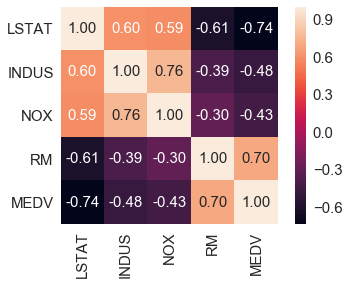

In [ ]:
import numpy as np
# ピアソンの積率相関係数を計算
print(df[cols].values.T)
cm = np.corrcoef(df[cols].values.T) 

# 全体のスケールとは別にフォントサイズを指定
sns.set(font_scale=1.5)

# ヒートマップ
hm = sns.heatmap(cm,
                 cbar=True,   # カラーバーの表示
                 annot=True,  # データ値の表示
                 square=True, # 各矩形の正方形化(縦横サイズを一致させる)
                 fmt='.2f',   # 数値などの表示形式
                 annot_kws={'size': 15}, # データ値のサイズの設定
                 yticklabels=cols,       # 行の目盛のラベル名
                 xticklabels=cols)       # 列の目盛のラベル名
plt.show()

# 線形回帰

訓練データ(1次元データ) nはサンプル数  
$\boldsymbol{x}=(x_1, \cdots, x_n)^T, \boldsymbol{y}=(y_1, \cdots, y_n)^T$

コスト関数
$$
E = \sum_{i=1}^{n}(y_i - (ax_i + b))^2
$$

$\frac{dE}{da}=0, \frac{dE}{db}=0$を解いて

$$
    b=\frac{1}{n}\sum_{i=1}^{n}(y_i - ax_i) \\
    a=\frac{\sum_{i=1}^{n}x_iy_i - \frac{1}{n}\sum_{i=1}^{n}x_i\sum_{i=1}^{n}y_i}{\sum_{i=1}^{n}x_i^2 - \frac{1}{n}(\sum_{i=1}^nx_i)^2}
$$

### 特徴量ベクトルが多次元の場合

$$
y=w_0+w_1x_1+w_2x_2+\cdots+w_dx_d+\epsilon\\
y=\boldsymbol{w}^T\tilde{\boldsymbol{x}}
$$

nサンプル同時に扱う場合  
$$
    \hat{\boldsymbol{y}}(\boldsymbol{w})=\tilde{\boldsymbol{X}}\boldsymbol{w}
$$

コスト関数
$$
\begin{align}
    E(\boldsymbol{w}) &= ||\boldsymbol{y}-\tilde{\boldsymbol{X}}\boldsymbol{w}||^2 \\
    &= (\boldsymbol{y} - \tilde{\boldsymbol{X}}\boldsymbol{w})^T(\boldsymbol{y} - \tilde{\boldsymbol{X}}\boldsymbol{w}) \\
    &= \boldsymbol{y}^T\boldsymbol{y} - \boldsymbol{w}^T\tilde{\boldsymbol{X}}^T\boldsymbol{y} - \boldsymbol{y}^T\tilde{\boldsymbol{X}}\boldsymbol{w} + \boldsymbol{w}^T\tilde{\boldsymbol{X}}^T\tilde{\boldsymbol{X}}\boldsymbol{w}
\end{align}
$$

$$
    \nabla E(\boldsymbol{w}) = -2\tilde{\boldsymbol{X}}\boldsymbol{y} + 2\tilde{\boldsymbol{X}}^T\tilde{\boldsymbol{X}}\boldsymbol{w} = 0
$$

$$
    \tilde{\boldsymbol{X}}^T\boldsymbol{y} = \tilde{\boldsymbol{X}}^T\tilde{\boldsymbol{X}}\boldsymbol{w} \quad 1次連立方程式！\\
    \boldsymbol{w} = (\tilde{\boldsymbol{X}}^T\tilde{\boldsymbol{X}})^{-1}\tilde{\boldsymbol{X}}^T\boldsymbol{y} \quad 正規方程式
$$

In [ ]:
import numpy as np
from scipy import linalg

class NativeLinearRegression:
    def __init__(self):
        self.w_ = None
        
    def fit(self, X, t):
        Xtil = None
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
            
        A = np.dot(Xtil.T, Xtil)
        b = np.dot(Xtil.T, t)
        self.w_ = linalg.solve(A, b)
        
    def predict(self, X):
        Xtil = None
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

In [ ]:
% matplotlib inline

係数： [1.11450326 1.95737004 3.00295751]
(1, 1)に対する予測値： [6.07483081]


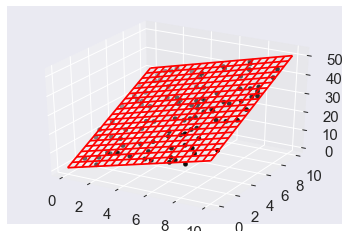

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

n = 100
scale = 10
np.random.seed(0)
X = np.random.random((n, 2)) * scale
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n)

model = NativeLinearRegression()
model.fit(X, y)
print("係数：", model.w_)
print("(1, 1)に対する予測値：", model.predict(np.array([1, 1]).reshape(1, -1)))

xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20), np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() + model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color="k")
ax.plot_wireframe(xmesh, ymesh, zmesh, color="r")
plt.show()


## 勾配降下型線形回帰

利点：非常に大きなデータセットを扱っている場合，計算コストが非常に高い$(\tilde{\boldsymbol{X}}^T\tilde{\boldsymbol{X}})^{-1}$を回避できる。  
また，特徴行列$\tilde{\boldsymbol{X}}$の場合，逆行列が求められずにアウト!

$$
    E(\boldsymbol{w})=\frac{1}{2}\sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)})^2
$$

In [ ]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta # 学習率
        self.n_iter = n_iter # トレーニング回数
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1]) # 重みを初期化
        self.cost_ = [] # コスト関数の値を初期化
        
        
        for i in range(self.n_iter):
            output = self.net_input(X) # 活性化関数の出力を計算
            errors = (y - output) # 誤差を計算
            cost = (errors**2).sum() / 2.0 # コスト関数を計算
            
            # 勾配降下法
            self.w_[1:] -= -self.eta * np.dot(X.T, errors) # 重みw_{1}以降を更新
            self.w_[0] -= -self.eta * errors.sum() # 重みw_{0}を更新
            
            self.cost_.append(cost)
            
    def predict(self, X):
        return self.net_input(X)

データセット

In [ ]:
# 目的数：MEDV, 説明変数：RM
X = df['RM'].values # 1xnベクトル
print(X.ndim)
print(X.shape)
print(X.reshape(-1, 1).shape)
print(X.reshape(-1, 1).ndim)

y = df['MEDV'].values # 1xnベクトル
print(y.ndim)
print(y.shape)
print(y.reshape(-1, 1).shape)
print(y.reshape(-1, 1).ndim)

# 標準化
X_std = (X - X.mean()) / X.std()
y_std = (y - y.mean()) / y.std()

1
(506,)
(506, 1)
2
1
(506,)
(506, 1)
2


学習

In [ ]:
lr = LinearRegressionGD()

# 特徴量ベクトルは必ずサイズを(データ数, 特徴量の個数)に指定して行う。
# 1次元配列の場合（特徴量が1次元）は，(N,) -> (N, 1)に変換
lr.fit(X_std[:, np.newaxis], y_std)

エポックとコストの関係を示す学習曲線

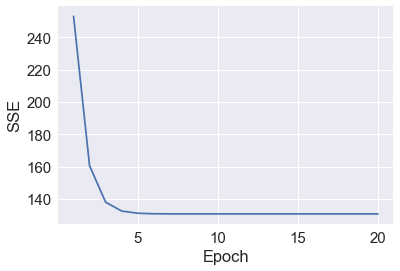

In [ ]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE') # 二乗誤差
plt.xlabel('Epoch')
plt.show()

データセットへのフィッティング度合い(標準化後)

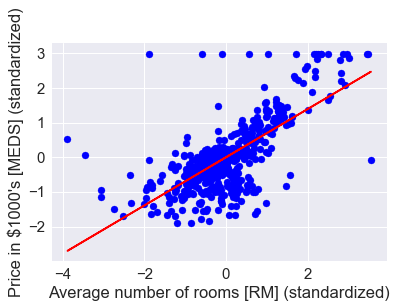

In [ ]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return

lin_regplot(X_std[:, np.newaxis], y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDS] (standardized)')
plt.show()

In [ ]:
# 1サンプルに対する予測結果
num_rooms_std = (5.0 - X.mean()) / X.std()
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % (price_std * y.std() + y.mean()))

Price in $1000's: 10.840


In [ ]:
# 標準化した変数を扱っている場合、切片はゼロになる
print('Sloop: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Sloop: 0.695
Intercept: -0.000


データセットへのフィッティング度合い(標準化後)

## scikit-learnのLinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

Liblinearライブラリなどを使い，最適化度合いが高いクラス

In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X[:, np.newaxis], y)
print(X[:, np.newaxis].shape)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

(506, 1)
Slope: 9.102
Intercept: -34.671


Text(0,0.5,"Price in $1000's [MEDV]")

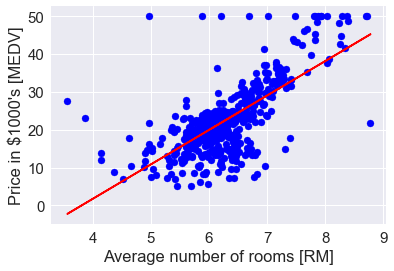

In [ ]:
# RMに対するMEDVをプロット(未標準化)
lin_regplot(X[:, np.newaxis], y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')

# Ridge回帰

パラメータ$\boldsymbol{w}$が小さくなるように最適化される→汎化性能が高く，過学習しにくい

$$
    E(\boldsymbol{w}) = ||\boldsymbol{y} - \tilde{\boldsymbol{X}}\boldsymbol{w}||^2 + \lambda||\boldsymbol{w}||^2 \\
    \boldsymbol{w} = (\tilde{\boldsymbol{X}}^T\tilde{\boldsymbol{X}} + \lambda\boldsymbol{I})^{-1}\tilde{\boldsymbol{X}}^T\boldsymbol{y}
$$

In [ ]:
class NativeRidgeRegression:
    def __init__(self, lambda_=1.0):
        self.lambda_ = lambda_
        self.w_ = None
        
    def fit(self, X, t):
        Xtil = None
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
            
        I = np.eye(Xtil.shape[1])
        A = np.dot(Xtil.T, Xtil) + self.lambda_ * I # リッジの特異性
        b = np.dot(Xtil.T, t)
        self.w_ = linalg.solve(A, b)
        
    def predict(self, X):
        Xtil = None
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

係数： [1.06545621 1.96200961 3.00594504]
(1, 1)に対する予測値： [6.03341087]


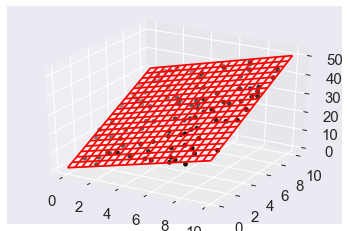

In [ ]:
n = 100
scale = 10
np.random.seed(0)
X = np.random.random((n, 2)) * scale
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n)

model = NativeRidgeRegression(1.0)
model.fit(X, y)
print("係数：", model.w_)
print("(1, 1)に対する予測値：", model.predict(np.array([1, 1]).reshape(1, -1)))

xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20), np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() + model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color="k")
ax.plot_wireframe(xmesh, ymesh, zmesh, color="r")
plt.show()


正則化の強さ

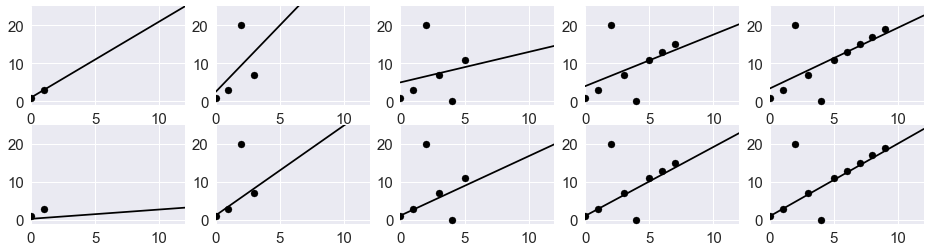

In [ ]:
x = np.arange(12)
y = 1 + 2 * x
y[2] = 20
y[4] = 0

xmin = 0
xmax = 12
ymin = -1
ymax = 25
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 4))

for i in range(5):
    axes[0, i].set_xlim([xmin, xmax])
    axes[0, i].set_ylim([ymin, ymax])
    axes[1, i].set_xlim([xmin, xmax])
    axes[1, i].set_ylim([ymin, ymax])
    xx = x[:2 + i * 2].reshape(-1, 1)
    yy = y[:2 + i * 2].reshape(-1, 1)
    axes[0, i].scatter(xx, yy, color="k")
    axes[1, i].scatter(xx, yy, color="k")
    model = NativeLinearRegression()
    model.fit(xx, yy)
    xs = [xmin, xmax]
    ys = [model.w_[0] + model.w_[1] * xmin, model.w_[0] + model.w_[1] * xmax]
    axes[0, i].plot(xs, ys, color="k")
    model = NativeRidgeRegression(10.0)
    model.fit(xx, yy)
    xs = [xmin, xmax]
    ys = [model.w_[0] + model.w_[1] * xmin, model.w_[0] + model.w_[1] * xmax]
    axes[1, i].plot(xs, ys, color="k")
    
plt.show()

### scikit-learnのRidge回帰

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

(100, 2)
Slope: -0.069
Intercept: 5.225


Text(0,0.5,"Price in $1000's [MEDV]")

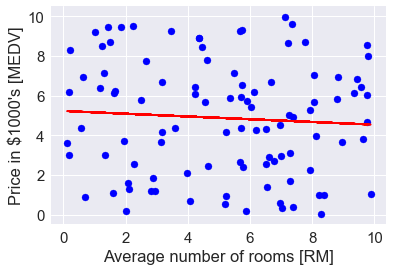

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) # L2ペナルティ項の影響度合いを表す値
print(X.shape)

ridge.fit(X[:,0].reshape(-1,1), X[:,1].reshape(-1,1))
print('Slope: %.3f' % ridge.coef_[0])
print('Intercept: %.3f' % ridge.intercept_)

# RMに対するMEDVをプロット(未標準化)
lin_regplot(X[:,0].reshape(-1,1), X[:,1].reshape(-1,1), ridge)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')

# 多項式回帰

$$
    \tilde{\boldsymbol{t}} = 
    \begin{pmatrix}
        w_0 + w_1x_1 + w_2x_1^2 + w_3x_1^3 + \cdots + w_dx_1^d \\
        w_0 + w_1x_2 + w_2x_2^2 + w_3x_2^3 + \cdots + w_dx_2^d \\
        w_0 + w_1x_3 + w_2x_3^2 + w_3x_3^3 + \cdots + w_dx_3^d \\
        \vdots \\
        w_0 + w_1x_n + w_2x_n^2 + w_3x_n^3 + \cdots + w_dx_n^d \\
    \end{pmatrix}
    = 
    \begin{pmatrix}
        1 & x_1 & x_1^2 & \cdots & x_1^d \\
        1 & x_2 & x_2^2 & \cdots & x_2^d \\
        \vdots & \vdots & \ddots & \vdots &  \\
        1 & x_n & x_n^2 & \cdots & x_n^d
    \end{pmatrix}
    \begin{pmatrix}
        w_0 \\
        w_1 \\
        \vdots \\
        w_d
    \end{pmatrix}
    =
    \boldsymbol{M}\boldsymbol{w}
$$

与える変数自体は高々n個であって，累乗の変数を先に作ってから，線形回帰系に代入する

In [ ]:
class NativePolynominalRegression:
    def __init__(self, degree):
        self.degree_ = degree
        
    def fit(self, X, t):
        x_pow = []
        x = X.reshape(len(X), 1)
        for i in range(1, self.degree_ + 1):
            x_pow.append(x**i) # x_iの累乗の縦ベクトル
        mat = np.concatenate(x_pow, axis=1) # 列方向に連結
        print(mat.shape)
        print(mat.ndim)
        linreg = NativeLinearRegression()
        linreg.fit(mat, t)
        self.w_ = linreg.w_
        
    def predict(self, X):    
        r = 0
        for i in range(self.degree_ + 1):
            r += X**i * self.w_[i]
        return r

(10, 10)
2


C:\Anaconda5.1\envs\kaggle\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.447590e-31
  app.launch_new_instance()


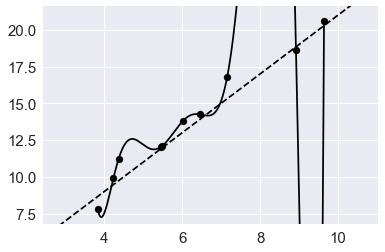

In [ ]:
np.random.seed(0)

def f(x):
    return 1 + 2 * x

x = np.random.random(10) * 10
y = f(x) + np.random.randn(10)

# 多項式回帰
model = NativePolynominalRegression(10)
model.fit(x, y)

fig, ax = plt.subplots()
ax.scatter(x, y, color="k")
ax.set_ylim([y.min() - 1, y.max() + 1])
xx = np.linspace(x.min(), x.max(), 300)
yy = np.array([model.predict(u) for u in xx])
ax.plot(xx, yy, color="k")

# 線形回帰
model = NativeLinearRegression()
model.fit(x, y)
b, a = model.w_
x1 = x.min() - 1
x2 = x.max() + 1
plt.plot([x1, x2], [f(x1), f(x2)], color="k", linestyle="dashed")

plt.show()

### scikit-learnの多項式回帰

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures

In [ ]:
# 多項式回帰：y = w0 + w1・x + w2・x^2 + .... + wd ・x^d
# dは多項式の次数を表す
# 線形回帰の係数ｗについては、線形であるため、重回帰モデルとみなす
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0,
             270.0,
             294.0,
             320.0,
             342.0,
             368.0,
             396.0,
             446.0,
             480.0,
             586.0])
X = X[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [ ]:
# 線形回帰（最小二乗法）モデルのクラスをインスタンス化
lr = LinearRegression()
pr = LinearRegression()

# 2次の多項式特徴量のクラスをインスタンス化
quadratic = PolynomialFeatures(degree=2)
print(X)

# データに適合させ、データを変換
X_quad = quadratic.fit_transform(X)
print(X_quad)

# 線形回帰モデルの学習
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
# 予測値を計算
y_lin_fit = lr.predict(X_fit)

# 多項式回帰モデルの学習
pr.fit(X_quad, y)
# 2次式でyの値を計算
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

[[258.]
 [270.]
 [294.]
 [320.]
 [342.]
 [368.]
 [396.]
 [446.]
 [480.]
 [586.]]
[[1.00000e+00 2.58000e+02 6.65640e+04]
 [1.00000e+00 2.70000e+02 7.29000e+04]
 [1.00000e+00 2.94000e+02 8.64360e+04]
 [1.00000e+00 3.20000e+02 1.02400e+05]
 [1.00000e+00 3.42000e+02 1.16964e+05]
 [1.00000e+00 3.68000e+02 1.35424e+05]
 [1.00000e+00 3.96000e+02 1.56816e+05]
 [1.00000e+00 4.46000e+02 1.98916e+05]
 [1.00000e+00 4.80000e+02 2.30400e+05]
 [1.00000e+00 5.86000e+02 3.43396e+05]]


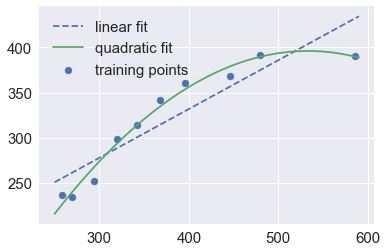

In [ ]:
# 散布図、線形回帰モデル、多項式回帰モデルの結果をプロット
plt.scatter(X, y, label="training points")
plt.plot(X_fit, y_lin_fit, label="linear fit", linestyle="--")
plt.plot(X_fit, y_quad_fit, label="quadratic fit")
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print("Training MSE linar: %.3f, quadratic: %.3f" % 
      (mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))

Training MSE linar: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


Housingデータセットで非線形関係をモデリングする

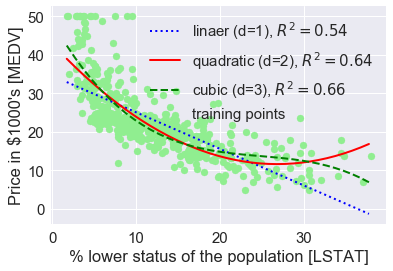

In [ ]:
# 多項式回帰 2次(quadratic), 3次(cubic)でモデリング
# MEDV(住宅価格の中央値), LSTAT(低所得者の割合)の関係をモデリングして、線形回帰モデルと多項式回帰モデルの結果を比較する
X = df['LSTAT'].values
X = X[:, np.newaxis]
y = df['MEDV'].values
regr = LinearRegression()

# 多項式の特徴量を作成
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 線形回帰モデルの学習
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# 2次の多項式回帰モデルの学習
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quatratic_r2 = r2_score(y, regr.predict(X_quad))

# 3次の多項式回帰モデルの学習
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# 各モデルの結果をプロット
plt.scatter(X, y, label='training points', color='lightgreen')
plt.plot(X_fit, y_lin_fit, label='linaer (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2, linestyle=":")
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2=%.2f$' % quatratic_r2, color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label="cubic (d=3), $R^2=%.2f$" % cubic_r2, color='green', lw=2, linestyle='--')

plt.xlabel("% lower status of the population [LSTAT]")
plt.ylabel("Price in $1000\'s [MEDV]")
plt.legend(loc='upper right')
plt.show()

# 説明変数を対数変換, 目的変数を平方根変換すると，線形空間に写像されて，簡単な線形回帰でモデリングもできる(工夫)

特徴量を線形特徴空間に変換して，線形回帰モデルに適用  
$$
    f(x) = 2^{-x} \\
    \log (f(x)) = -x
$$

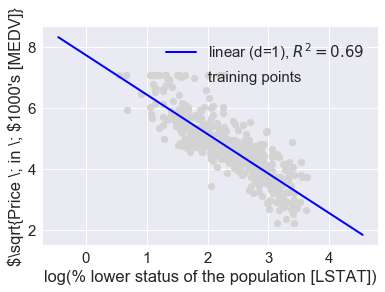

In [ ]:
regr = LinearRegression()

# 特徴量を変換
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# 特徴量への適合
X_fit = np.arange(X_log.min() - 1, X_log.max() + 1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linaer_r2 = r2_score(y_sqrt, regr.predict(X_log))

# 射影したデータを使った学習効果をプロット
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linaer_r2, color='blue', lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}')
plt.legend(loc='upper right')
plt.show()

# ラッソ回帰

### 疎なパラメータ最適で汎化性能を上げる  
ただし，Lasso回帰には成約があり，データサンプルnよりも特徴量ｄの方が多い場合$(d > n)$，最大値であるnを選択する必要がある。

コスト関数にL1正則化を追加したもの アルゴリズムはコスト関数が微分可能出ないので，右偏微分，左偏微分，座標勾配降下法という工夫を行う。

$$
    \boldsymbol{E} = \frac{1}{2}||\boldsymbol{y}-\tilde{\boldsymbol{X}}\boldsymbol{w}||^2 + \lambda||\boldsymbol{w}||_1\\
    |\boldsymbol{w}|_1 = \sum_{i=1}^{d}|w_i|
$$

### 座標降下法(coordinate descent)・・・ラッソ回帰の最適化方法

一般に$\boldsymbol{x}\in R^d$の関数$\boldsymbol{E}(\boldsymbol{w})$を最小化したいときに，$\frac{\partial\boldsymbol{E}}{\partial x_j}=0 \:(j=0,\cdots,d)$を__同時に__求めるのは難しいので，適当な初期値からスタートして，$\frac{\partial\boldsymbol{E}}{\partial x_1}=0$を満たす$x_1$の値で$x_1$を更新し，$\frac{\partial\boldsymbol{E}}{\partial x_2}=0$を満たす$x_2$の値で$x_2$を更新し，というふうに__各座標軸のパラメータごと__に勾配がゼロの点を繰り返し求めていく方法。これによって，関数$\boldsymbol{E}$が極小値に近づく。

・適当な初期値$\boldsymbol{x}^{(0)}=(x_1^{(0)},x_2^{(0)},\cdots,x_d^{(0)})$を決める  
1. $\frac{\partial\boldsymbol{E}}{\partial x_1}(x_1, x_2^{(k)}, x_3^{(k)}, \cdots, x_d^{(k)})=0$を満たすような$x_1$を求め，その値を$x_1^{(k+1)}$とする。
2. $\frac{\partial\boldsymbol{E}}{\partial x_2}(x_1^{(k+1)}, x_2, x_3^{(k)}, \cdots, x_d^{(k)})=0$を満たすような$x_2$を求め，その値を$x_2^{(k+1)}$とする。
3. 以下同様に$x_3^{(k+1)}$から$x_d^{(k+1)}$までを求める。

以上で，通常の__同時に__1回の勾配を求める作業と同じになる。

### ラッソ回帰のコスト関数E(w)は微分不可能な|x|を含んでいるので，wの符号に合わせて，右微分・左微分で対応する

絶対値関数$f(x)=|x|$の右微分・左微分  
$$
\begin{align}
    d^+(|x|)&=\lim_{h \to +0}\frac{|x+h|-|x|}{h}=\lim_{h \to +0}\frac{(x+h)-x}{h}=1\\
    d^-(|x|)&=\lim_{h \to -0}\frac{|x+h|-|x|}{h}=\lim_{h \to -0}\frac{-(x+h)-(-x)}{h}=-1
\end{align}
$$

### 変数$w_j$による右偏微分を$\partial_{w_j}^+$，左偏微分を$\partial_{w_j}^-$と記述する

$$
    \boldsymbol{E}(\boldsymbol{w})=\frac{1}{2}\sum_{i=0}^{n}\bigl(y^i - \phi(\boldsymbol{w})^i\bigr)^2 + |\boldsymbol{w}|
$$

線形関数（正規分布をベースにした関数)は$\phi(\boldsymbol{w})^i = w_0 + x_1^{i}w_1 + x_2^{i}w_2 + \cdots + x_d^{i}$

$\boldsymbol{w}=(w_0, w_1, \cdots, w_d)$の中でも特殊例外の$w_0$の微分を求める。

$$
\begin{align}
    \frac{\partial \boldsymbol{E}(\boldsymbol{w})}{\partial w_0}&=-\sum_{i=1}^{n}\biggl(y^i - w_0 - \sum_{j=1}^{d}x_j^iw_j\biggr)\\
    &= \sum_{i=1}^{n}\biggl(y^i - \sum_{j=1}^{d}x_j^iw_j\biggr) + nw_0 = 0 \\
    w_0 &= \frac{1}{n}\sum_{i=1}^{n}\biggl(y^i - \sum_{j=1}^{d}x_j^iw_j\biggr)
\end{align}
$$

次に$w_k(j\neq0)$についての右微分と左微分を行う 
$$
\partial_{w_k}^+ \boldsymbol{E} = -\sum_{i=1}^{n}\biggl(y^i - w_0 - \sum_{j=1}^{d}x_{j}^{i}w_j\biggr)x_k^j + \lambda \\
\partial_{w_k}^- \boldsymbol{E} = -\sum_{i=1}^{n}\biggl(y^i - w_0 - \sum_{j=1}^{d}x_{j}^{i}w_j\biggr)x_k^j - \lambda
$$

$\partial_{w_j}^+$=0とおいて，$w_k$について解き，その値を$w_k^+$おく。  

$$
        w_k^{+} = \frac{\sum_{i=1}^{n}\Biggl(y^i - w_0 - \sum_{j\neq k}^{d}x_j^iw_j\Biggr)x_k^i - \lambda}{\sum_{i=1}^{n}(x_k^{(i)})^2}
$$

$\partial_{w_j}^-$=0とおいて，$w_k$について解き，その値を$w_k^-$おく。

$$
        w_k^{-} = \frac{\sum_{i=1}^{n}\Biggl(y^i - w_0 - \sum_{j\neq k}^{d}x_j^iw_j\Biggr)x_k^i + \lambda}{\sum_{i=1}^{n}(x_k^{(i)})^2}
$$

いま，普通の座標降下法と同様に偏微分したものが，０になるように変数の値を決めます。今$w_k$の値を更新しようとしているとすると，__更新後の値の候補__は$\boldsymbol{w_k^+}$または$\boldsymbol{w_k^-}$となる。$\boldsymbol{w_k^+}$は$w_k>0$を$\boldsymbol{w_k^-}$は$w_k<0$を前提として計算られたものなので，$\boldsymbol{w_k^+}>0$ならば，$\boldsymbol{w_k^+}$に更新し，$\boldsymbol{w_k^-}<0$ならば$\boldsymbol{w_k^-}$に更新する。また，$w_k^+>0$と$w_k^-<0$の両方を満たさないときは$w_k$の値は0のままで更新しない。

### 状況整理として，ソフト閾値関数Sを導入する

$$
    S(p,q) = sgn(p)max(0,||p||-q)\\
    sgn(x) = \left\{
    \begin{array}{}
    -1 & (x < 0) \\
    0  & (x = 0) \\
    1  & (x > 0)
    \end{array}
    \right.
$$

更新後の$w_k$の値は$\bar{w_k}$で表される。
$$
    \bar{w_k}=\frac{S\Biggl(\sum_{i=1}^{n}\biggl(y^i - w_0 - \sum_{j \neq k}^{d}x_j^{i}w_j\biggr)x_k^i, \: \lambda \Biggr)}{\sum_{i=1}^{n}(x_k^i)^2}$$


実際,$w_k^+>0$となる条件は  
$$
    \sum_{i=1}^{n}\biggl(y^i - w_0 - \sum_{j \neq k}^{d}x_j^iw_j\biggr)x_k^i > \lambda
$$

$\bar{w_k}<0$となる条件は
$$
     \sum_{i=1}^{n}\biggl(y^i - w_0 - \sum_{j \neq k}^{d}x_j^iw_j\biggr)x_k^i < -\lambda
$$

$$
    -\lambda \le \sum_{i=1}^{n}\bigl(y_i - w_0 - \sum_{j \neq k}x_{ij}w_j \bigr)x_{ik} \le \lambda
$$

$$
    S\Biggl(\sum_{i=1}^{n}\biggl(y_i - w_0 - \sum_{j \neq k}x_{ij}w_{j}\biggr)x_{ik}, \; \lambda \Biggr) \\
    = \left\{
    \begin{array}{}
        \sum_{i=1}^{n}(y_i - w_0 - \sum_{j \neq k}x_{ij}w_{j})x_{ik} - \lambda) \quad (\sum_{i=1}^{n}(y^i - w_0 - \sum_{j \neq k}^{d}x_j^iw_j)x_k^i > \lambda)\\
        0\quad -\lambda \le \sum_{i=1}^{n}\bigl(y_i - w_0 - \sum_{j \neq k}x_{ij}w_j \bigr)x_{ik} \le \lambda\\
        \sum_{i=1}^{n}(y_i - w_0 - \sum_{j \neq k}x_{ij}w_{j})x_{ik} + \lambda) \quad (\sum_{i=1}^{n}(y^i - w_0 - \sum_{j \neq k}^{d}x_j^iw_j)x_k^i < -\lambda)
    \end{array}
    \right.
$$

<img src="./回帰分析_data/Lasso回帰に使用するSoftThreshold関数.jpg">

ラッソ回帰

In [ ]:
import numpy as np

def soft_thresholding(x, y):
    return np.sign(x) * max(abs(x) - y, 0)

class NativeLasso:
    def __init__(self, lambda_=0.01, tol=0.0001, max_iter=1000):
        self.lambda_ = lambda_
        self.tol_ = tol
        self.max_iter_ = max_iter
        self.w_ = None
        
    def fit(self, X, y):
        n, d = X.shape
        self.w_ = np.zeros(d + 1)
        L1Norm_avg = 0.0
        
        for _ in range(self.max_iter_):
            pre_L1Norm_avg = L1Norm_avg
            self.coordinate_descent_update(n, d, X, y)
            L1Norm_avg = np.abs(self.w_).sum() / self.w_.shape[0]
            if abs(L1Norm_avg - pre_L1Norm_avg) <= self.tol_:
                break
                
    def coordinate_descent_update(self, n, d, X, y):
        # 座標降下法
        self.w_[0] = (y - np.dot(X, self.w_[1:])).sum(axis=0) / n
        w0vec = np.ones(n) * self.w_[0]
        for k in range(d):
            ww = self.w_[1:]
            ww[k] = 0 # (k=1,2,..., d)の更新対象のパラメータ
            q = np.dot(y - w0vec - np.dot(X, ww), X[:, k])
            r = np.dot(X[:, k], X[:, k])
            self.w_[k+1] = soft_thresholding(q / r, self.lambda_)
            
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(X.shape[0], 1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)
    
    

In [ ]:
import csv

# データ読み込み
Xy = []
with open("./回帰分析_data/winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64)

# TrainingDataとTestDataに分割
np.random.seed(0)
np.random.shuffle(Xy)
train_X = Xy[:-1000, :-1]
train_y = Xy[:-1000, -1]
test_X = Xy[-1000:, :-1]
test_y = Xy[-1000:, -1]

# ハイパーパラメータを変えながら学習させて結果を表示
for lambda_ in [1.0, 0.1, 0.01]:
    model = NativeLasso(lambda_)
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    print("--- lambda --- = {} ---".format(lambda_))
    print("coefficients:")
    print(model.w_)
    mse = ((pred_y - test_y)**2).mean()
    print("MSE: {:.3f}".format(mse))

--- lambda --- = 1.0 ---
coefficients:
[ 5.58430718  0.         -0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.          0.        ]
MSE: 0.691
--- lambda --- = 0.1 ---
coefficients:
[ 5.73493612  0.         -0.1407455   0.34369322 -0.         -2.00071813
  0.         -0.         -0.          0.          0.          0.        ]
MSE: 0.636
--- lambda --- = 0.01 ---
coefficients:
[ 5.71424724  0.         -1.01439751  0.00742223  0.         -3.34228417
  0.         -0.          0.          0.          1.04248618  0.        ]
MSE: 0.539


## scikit-learnのLasso回帰

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

1
(506,)
(506, 1)
2
1
(506,)
(506, 1)
2
(506, 1)


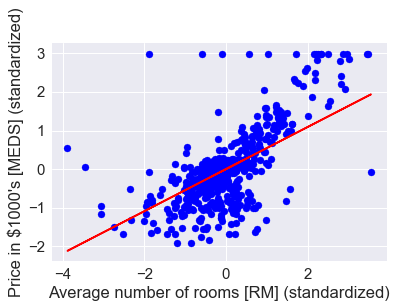

In [ ]:
# 目的数：MEDV, 説明変数：RM
X = df['RM'].values # 1xnベクトル
print(X.ndim)
print(X.shape)
print(X.reshape(-1, 1).shape)
print(X.reshape(-1, 1).ndim)

y = df['MEDV'].values # 1xnベクトル
print(y.ndim)
print(y.shape)
print(y.reshape(-1, 1).shape)
print(y.reshape(-1, 1).ndim)

# 標準化
X_std = (X - X.mean()) / X.std()
y_std = (y - y.mean()) / y.std()


from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.15) # L1ペナルティ項の影響度合い

lasso.fit(X_std[:, np.newaxis], y_std)
print(X_std[:, np.newaxis].shape)

lin_regplot(X_std[:, None], y_std, lasso)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDS] (standardized)')
plt.show()

# Elastic Net

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

リッジ回帰とラッソ回帰の折衷案  
コスト関数にL1+L2正則化を追加したもの

$$
\begin{align}
    E(\boldsymbol{w}) &= \frac{1}{2}\sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)})^{2} + \lambda_{1}||\boldsymbol{w}||_{2}^{2} + \lambda_{2}||\boldsymbol{w}||_{1} \\
    &= \frac{1}{2}\sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)})^{2} + \alpha\lambda_{1}||\boldsymbol{w}||_{2}^{2} + 0.5\alpha(1-\lambda_{1})||\boldsymbol{w}||_{1}
\end{align}
$$

L1_ratioを1.0に設定するとL2ペナルティがなくなるため、Lasso回帰と等しくなる

(506, 1)


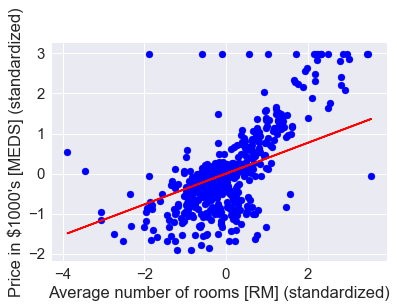

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.8, l1_ratio=0.01)

elasticnet.fit(X_std[:, np.newaxis], y_std)
print(X_std[:, np.newaxis].shape)

lin_regplot(X_std[:, None], y_std, elasticnet)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDS] (standardized)')
plt.show()

# RANSACロバスト回帰

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor

RANSAC(RANdom SAmpling Consensus)アルゴリズムによって，外れ値に対してロバストな回帰を実現する

外れ値の影響を抑えた上で、回帰を実行する手法の総称  
基本的なアイディアは外れ値の重みを小さくすること

RANSACアルゴリズムのポイントは外れ値でないデータセット, いわゆる__正常値(inlier)__を学習させる

1. 正常値としてランダムな数のサンプルを選択し，モデルを学習させる
2. 学習済みのモデルに対して，その他すべてのデータ点を評価し，ユーザー指定の許容範囲となるデータ点を正常値に加える。
3. すべての正常値を使ってモデルを再び学習させる。
4. 正常値に対する学習済みモデルの誤差を推定する。
5. モデル性能がユーザー指定のしきい値条件を満たしている場合，またはイテレーションが既定回数に達した場合アルゴリズムを終了させる。そうでなければ，

In [ ]:
# scikit-learnのRANSACRegressorオブジェクトを使用して、本章の線形モデルをRANSACモデルでラッピングする
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        residual_metric=lambda x: np.sum(np.abs(x), axis=1),
                        residual_threshold=5.0,
                        random_state=0)

ransac.fit(X[:, np.newaxis], y)

C:\Anaconda5.1\envs\kaggle\lib\site-packages\sklearn\linear_model\ransac.py:288: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x000001E795596EA0>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

学習済みのRANSAC線形回帰インスタンスから正常値と外れ値を取得して，モデル予測と一緒にプロット

line_X: [3 4 5 6 7 8 9]
line_X[:, np.newaxis] [[3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


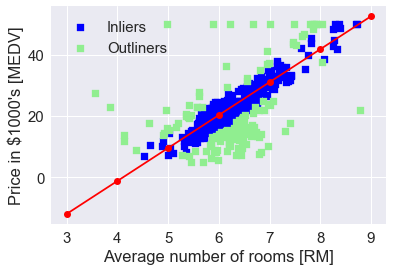

In [ ]:
inlier_mask = ransac.inlier_mask_ # 正常値を表す真偽値を取得
outlier_mask = np.logical_not(inlier_mask) # 外れ値を取得

# 3から9までの整数値を作成
line_X = np.arange(3, 10, 1) 
print("line_X:", line_X)
print("line_X[:, np.newaxis]", line_X[:, np.newaxis])

# 予測値を計算
line_y_ransac = ransac.predict(line_X[:, np.newaxis]) 

# 正常値をプロット
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='s', label='Inliers')

# 外れ値をプロット
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliners')

# 予測値をプロット
plt.plot(line_X, line_y_ransac, color='red', marker='o')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


# 決定木回帰

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

### 情報利得(IG)に平均二乗誤差(MSE)(分割後の分散)を使用して，子ノードの不純度を低下させるように分割していく

$$
    I(t)=MSE(t)=\frac{1}{N_t}\sum_{i \in D_t}(y~{(i)} - \hat{y_t})^2
$$

$N_t$はノードtのトレーニングサンプルの個数，$D_t$はノードtのトレーニングサブセット，$y^{(i)}$は真値，$\hat{y}_t$はノードtに属するサンプルの平均  
$$
    \hat{y}_t = \frac{1}{N_t}\sum_{i \in D_t}y^{(i)}
$$

非線形データを扱う場合に特徴量を変換する必要が一切ない。

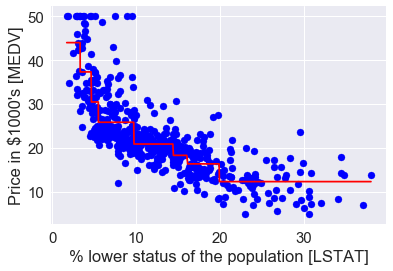

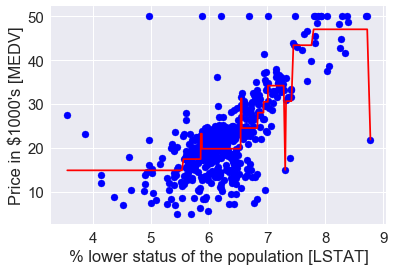

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

# 決定木回帰モデルのクラスをインスタンス化:max_depthで決定木の深さを指定
tree_lr = DecisionTreeRegressor(max_depth=3)
tree_lr.fit(X, y)

# argsortはソート後のインデックスを返し、flattenは1次元の配列を返す
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree_lr)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

X = df[['RM']].values # 1xnベクトル
y = df['MEDV'].values # 1xnベクトル

tree_lr = DecisionTreeRegressor(max_depth=4)
tree_lr.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree_lr)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

# ランダムフォレスト回帰

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

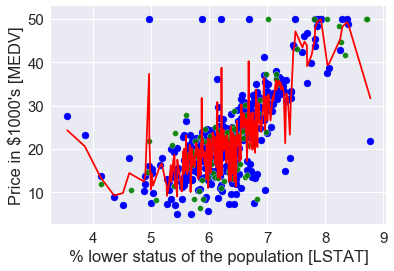

MSE train: 9.451, test: 47.631
R^2 train: 0.883, test: 0.518


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

forest_lr = RandomForestRegressor(n_estimators = 2000, # 決定木の個数
                                  criterion='mse', # 不純度にMSE
                                  random_state=1, 
                                  n_jobs=-1)

X = df[['RM']].values # 1xnベクトル
y = df['MEDV'].values # 1xnベクトル

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

forest_lr.fit(X_train, y_train)
y_train_pred = forest_lr.predict(X_train)
y_test_pred = forest_lr.predict(X_test)

sort_idx = X_train.flatten().argsort()

lin_regplot(X_train[sort_idx], y_train[sort_idx], forest_lr)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')


sort_idx = X_test.flatten().argsort()

plt.scatter(X_test[sort_idx], y_test[sort_idx], c='green', edgecolor='white', marker='o', s=35, alpha=0.9, label='test_data')
plt.show()

# MSE（平均二乗誤差）を出力
print('MSE train: %.3f, test: %.3f' % 
      (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

# R^2（決定係数）を出力
print('R^2 train: %.3f, test: %.3f' % 
      (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))


残差プロット

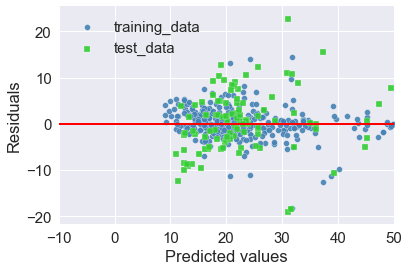

In [ ]:
plt.scatter(y_train_pred,
            y_train_pred - y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='training_data'
           )

plt.scatter(y_test_pred,
            y_test_pred - y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=35,
            alpha=0.9,
            label='test_data'
            )

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

# SVM回帰(SVR)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

# 線形回帰モデルの性能評価

### 重回帰分析の場合，データセットへのモデルの当てはまり度合いが2次元で確認できないので，残渣プロットで精度検証を行う

In [ ]:
# すべての変数を使用して、重回帰モデルをトレーニングする。
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
print(X.shape)

# トレーニングデータとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 線形重回帰
slr = LinearRegression()
slr.fit(X_train, y_train)

# 予測
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

(506, 13)


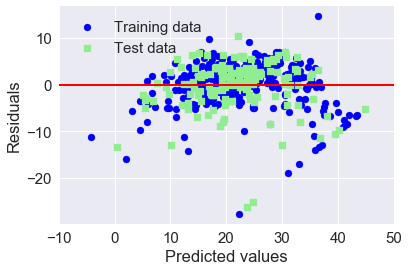

In [ ]:
# 残差プロット
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

### 数値的な精度検証はMSE(Mean Squared Error)を用いる

$$
    MSE=\frac{1}{n}\sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)})^2
$$

In [ ]:
# 線形回帰モデルのモデル性能：平均二乗誤差(Mean Squared Error : MSE)
# MSE = SSE / n : SSE(Sum of Squared Total) 誤差平方和
# 様々な回帰モデルの比較等に役立つ
from sklearn.metrics import mean_squared_error

# 平均二乗誤差を出力
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), 
                                       mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


### 決定係数R^2も効果的

$$
    R^2=1-\frac{SSE}{SST}\\
    SSE=\sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)})^2\\
    SST=\sum_{i=1}^{n}(y^{(i)}-\mu_y)^2\\
    \\
    \begin{align}
    R^2 &= 1 - \frac{SSE}{SST}\\
        &= 1 - \frac{\frac{1}{n}\sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)})^2}{\frac{1}{n}\sum_{i=1}^{n}(y^{(i)}-\mu_y)^2}\\
        &= 1 - \frac{MSE}{Var(y)}
    \end{align}
$$

In [ ]:
# 決定係数 R^2 = 1 - SSE/SST = 1 - MSE / var
# R^2(決定係数)のスコアを出力
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673
